# TASK 1- IRIS FLOWER CLASSIFICATION


# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Loading the data

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Datatype

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Finding null values

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Describing the data

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Shape

In [6]:
data.shape

(150, 6)

In [7]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Correlation

In [8]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

# Distribution plot

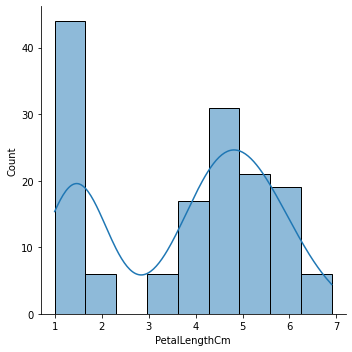

In [9]:
sns.displot(data["PetalLengthCm"],kde=True)

# Box plot

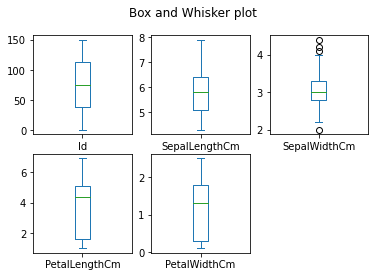

In [10]:
data.plot(kind = 'box', subplots = True, layout = (2, 3),sharex = False, sharey = False, title = "Box and Whisker plot ")
plt.show()

# Bar plot

Text(0, 0.5, 'count')

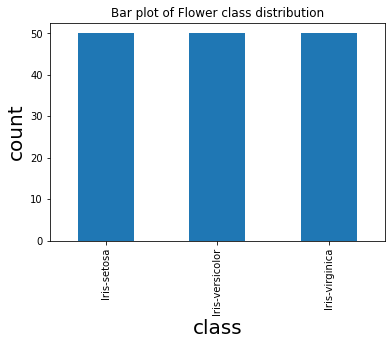

In [11]:
nameplot = data['Species'].value_counts().plot.bar(title='Bar plot of Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

# Pair Plot

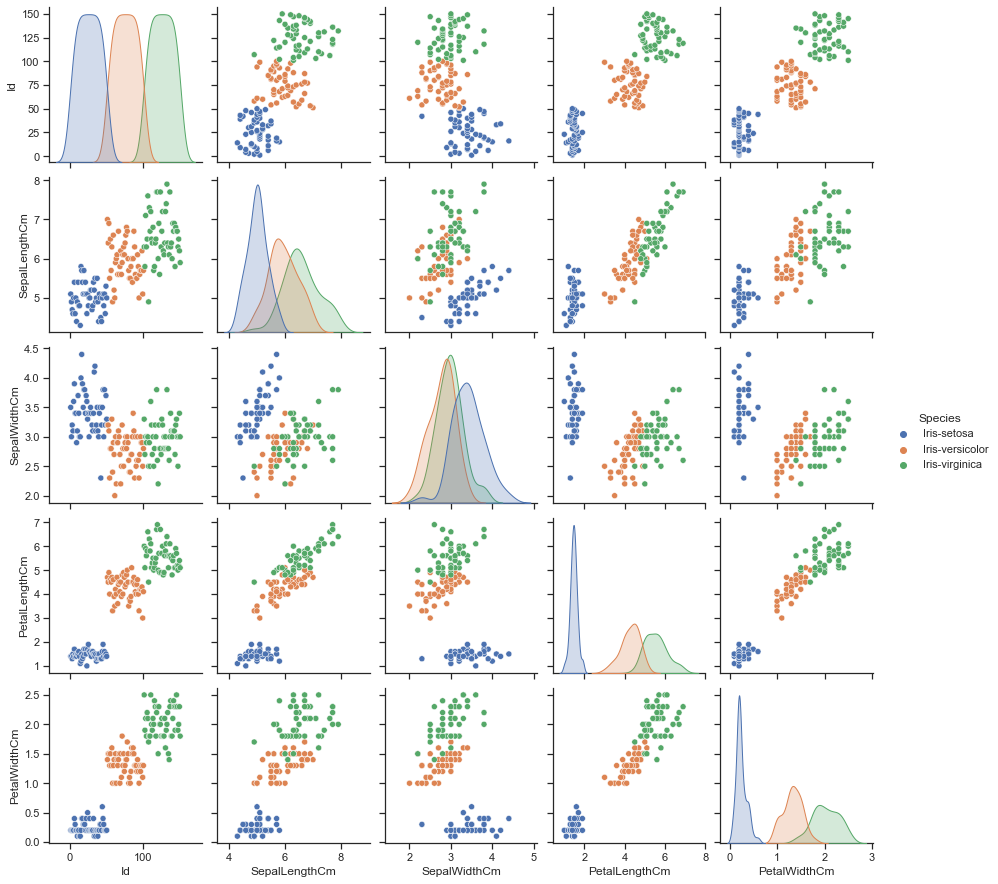

In [12]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data, hue="Species")

# Heat Map

<AxesSubplot:>

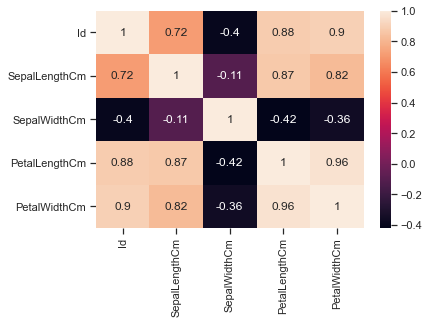

In [13]:
sns.heatmap(data.corr(),annot=True)


# Data Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
X = data.drop(['Species'], axis=1)
Y = data['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=20)

In [16]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (105, 5)
x_test.shape: (45, 5)
y_train.shape: (105,)
y_test.shape: (45,)


# Model Building

# Loading the models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [18]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")

# Evaluating each Models
names = []
accuracy = []
for name, model in models:
    
    # 10 Cross Fold Validation for each Models
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    # Displaying the Accuracy of each Model in Validation
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.894545
DTC: Accuracy = 0.971818
SVC: Accuracy = 1.000000


# Testing the models

In [19]:
models = []

# Linear Models
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))

# Non-linear Models
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(gamma = "auto")))

# Creating function for model building

In [20]:
def test_model(model):
    # Training the Dataset with Training Set
    model.fit(x_train, y_train)
    
    # Predicting the Values with Testing Set
    predictions = model.predict(x_test)
    
    # Model Testing Results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [21]:
# Predicting the Values
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)

----------------
Testing: LR
Accuracy: 0.9333333333333333
Confusion Matrix:
[[13  0  0]
 [ 0 15  3]
 [ 0  0 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91        18
 Iris-virginica       0.82      1.00      0.90        14

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.95      0.93      0.93        45

----------------
Testing: CART
Accuracy: 0.9777777777777777
Confusion Matrix:
[[13  0  0]
 [ 1 17  0]
 [ 0  0 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.96        13
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           0.98        45
      macro avg       0.98      0.98 

# Model Saving

In [22]:
import pickle

In [23]:
for name, model in models:
    filename = name + ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")
     

Saved all Models
